In [1]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# read json file
with open("claude-3.5-haiku_slow_500 times.json", "r", encoding="utf-8") as file:
    data=json.load(file)

# extract "responses" from the file
responses=data["responses"] 

# 确保每个响应是字典而非字符串
parsed_responses=[]
for response in responses:
    if isinstance(response, str):  # if it is a string, then parse it into dictionary
        try:
            parsed_responses.append(json.loads(response))
        except json.JSONDecodeError:
            print("无法解析响应为JSON：", response) # catch errors by "try-excpet"
    elif isinstance(response, dict):  # for the situation that it has already been dictonary
        parsed_responses.append(response)

print(parsed_responses)


无法解析响应为JSON： **Sorted Options:**
1. d
2. a
3. e
4. c
5. b

**Reasoning:**
1. **Reasons for Selection Order:** 
- The description suggests Linda's strong alignment with social justice and activism
- Logical probability decreases with more specific or complex conditions
- Conjunction fallacy is avoided by prioritizing simpler, more probable statements

2. **Reasoning Steps:**
- Analyze Linda's background: philosophy major, social justice concerns, anti-nuclear demonstrations
- Evaluate likelihood of each statement based on provided information
- Recognize that being a feminist activist is more consistent with her described profile
- Understand that adding additional conditions (like working as a bank teller) reduces probability
- Apply probability principles: specific claims are less likely than more general claims
- Systematically rank options from most to least probable based on available evidence

The ranking reflects a careful, step-by-step logical analysis of the given scenario and 

In [30]:
# extract the option from responses
sorted_options = []
for response in responses:
    if "**Sorted Options:**" in response:
        sorted_part=response.split("**Sorted Options:**")[1].split("\n\n")[0].strip() # extract the content after "**Sorted Options:**" but before "\n\n"
        orders=[line.split(".")[1].strip() for line in sorted_part.split("\n")] # extract options
        sorted_options.append(orders)

# Create a counter at each ordinal position and count the number of times the option appears in each position
orders_counts= {order: Counter() for order in range(1, 6)}
for orders in sorted_options:
    for i, option in enumerate(orders, 1):
        orders_counts[i][option]+=1
orders_counts

{1: Counter({'d': 356, 'e': 79, 'a': 65}),
 2: Counter({'a': 435, 'd': 65}),
 3: Counter({'e': 421, 'd': 79}),
 4: Counter({'c': 457, 'b': 43}),
 5: Counter({'b': 457, 'c': 43})}

In [32]:
# create a dataframe
orders_data = {f"Order {order}": dict(counts) for order, counts in orders_counts.items()}
df = pd.DataFrame(orders_data).fillna(0)

df1= df.T # tranpose the row and column

In [34]:
#caculate the conjunction and disjunction error
conjunction_fallacy_count= 0  
disjunction_fallacy_count= 0         
total_responses= len(sorted_options)

for orders in sorted_options:
    if orders.index('c') < orders.index('b'):
        conjunction_fallacy_count +=1

    if orders.index('a') < orders.index('e'):
        disjunction_fallacy_count +=1


conjunction_fallacy_prob= "%.2f%%"%((conjunction_fallacy_count / total_responses)*100)
disjunction_fallacy_prob= "%.2f%%"%((disjunction_fallacy_count / total_responses)*100)


print("The probability of conjunction fallacy is:",conjunction_fallacy_prob)
print("The probability of disjunction fallacy is:",disjunction_fallacy_prob)

The probability of conjunction fallacy is: 91.40%
The probability of disjunction fallacy is: 84.20%


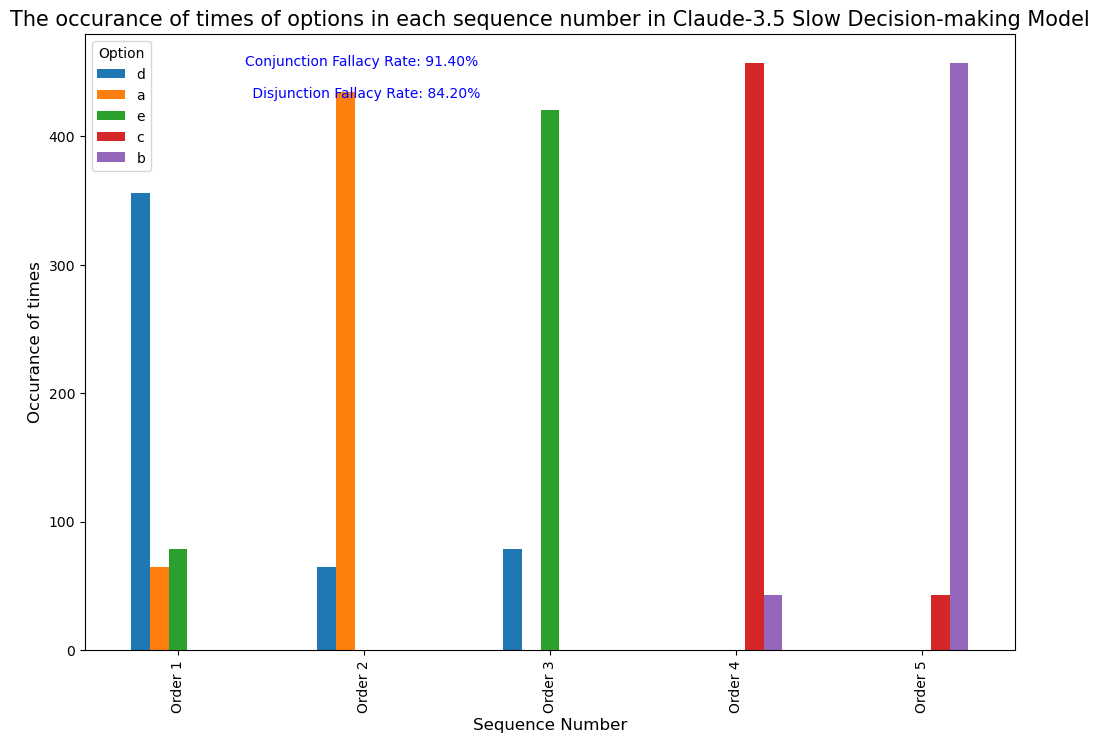

In [38]:
df1.plot(kind="bar", figsize=(12, 8))
plt.title("The occurance of times of options in each sequence number in Claude-3.5 Slow Decision-making Model",fontsize=15)
plt.xlabel("Sequence Number",fontsize=12)
plt.ylabel("Occurance of times",fontsize=12)
plt.legend(title="Option")
plt.text(1,430,"Conjunction Fallacy Rate: 91.40% \n\n Disjunction Fallacy Rate: 84.20%",ha="center",fontdict={"color":"blue"})
plt.show()
